# Fourier Transform

**Description:** The Fast Fourier Transform(FFT) is a method of representing signals as a sum of sinusoids. This notebook demonstrates the mechanisms of FFT as well as the reconstruction of a signal

**Example Description**: This example demonstrates:

- Producing a cosine wave
- Taking the FFT of the cosine wave
- Reconstructing the cosine wave from a handful of FFT terms

To start, let us import some useful math libs

In [657]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import animation, rc
from IPython.display import HTML
from IPython.display import Markdown as md
import numpy.linalg as lin
from pandas import DataFrame

### Drawing a basic cosine wave

Next, lets create a basic cosine wave that is defined by an **amplitude, frequency, phase shift, and offset**.

In [658]:
b = 3 # Offset
freq = 5 # Frequency 
phase = math.pi*(3/4) # Phase 
a = 2 # Amplitude 
res = 0.01
theta = np.arange(0,2*np.pi,res)
theta = theta if len(theta) % 2 == 0 else theta[0:len(theta)-1] 
y = a*np.cos(freq*theta+phase)+b # Equation 
md("<h3>Cosine Properties:</h3>Amplitude is %3.3f<br> Offset is %3.3f<br>Frequency is %3.3f<br>Phase is %3.3f<br>Equation is: $y=%3.3f \cdot cos(%3.3f \cdot \\theta + %3.3f)+%3.3f$"%(a,b,freq,phase,a,freq,phase,b))


<h3>Cosine Properties:</h3>Amplitude is 2.000<br> Offset is 3.000<br>Frequency is 5.000<br>Phase is 2.356<br>Equation is: $y=2.000 \cdot cos(5.000 \cdot \theta + 2.356)+3.000$

### Next, plot the cosine

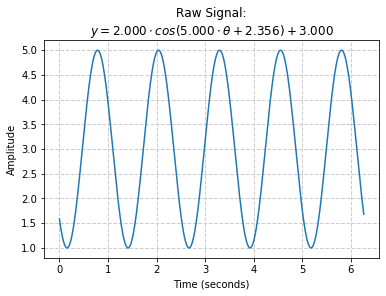

In [659]:
plt.plot(theta,y)
plt.title('Raw Signal:\n$y=%3.3f \cdot cos(%3.3f \cdot \\theta + %3.3f)+%3.3f$'%(a,freq,phase,b))
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.grid(color='0.8', linestyle='--', linewidth=1)

# Discrete Fourier Transform 

The Discrete Fourier Transform(DFT) is a simple transform to perform which can convert an arbitrary set of data into its frequency components. **Note:** Opperationally speaking one should use Fast Fourier Transform(FFT) which can be significantly more computationally efficent at scale. However, as shown below, the DFT is quite simple mathematically and to program:   

$
DFT[k] = \bigg| \sum^{N-1}_{n=0} \sum^{N-1}_{K=0}x[n] \cdot e^{-j \frac{2 \pi k n}{N}} \bigg|
$


In [660]:
# Discrete Fourier Transform 
def dft(data):
    N = len(data)
    out = np.zeros(N,dtype=complex)
    for n in range(N):
        for k in range(N):
            out[k] = out[k] + data[n]*np.exp((-1j*2*np.pi*k*n)/N)
    return out

### Perform the FFT and plot

FFT Results:
                        0
0   1884.435420+0.000000j
1      0.454059-0.094662j
2      0.520640-0.216398j
3      0.687180-0.426177j
4      1.232089-1.011386j
5 -440.407924+447.693790j
6     -1.023683+1.234701j
7     -0.475965+0.660973j
8     -0.297419+0.464991j
9     -0.210645+0.364332j


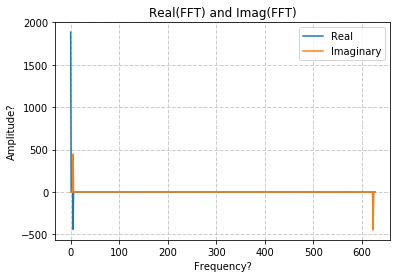

In [661]:
#res = np.fft.fft(y) # More computationally efficent 
res = dft(y)
print('FFT Results:')
print(DataFrame(res[0:10]))
plt.plot(np.real(res))
plt.plot(np.imag(res))
plt.legend(['Real','Imaginary'])
plt.title('Real(FFT) and Imag(FFT)')
plt.xlabel('Frequency?')
plt.ylabel('Amplitude?')
plt.grid(color='0.8', linestyle='--', linewidth=1)


### Cleanup FFT

As observed, the output of the FFT is simply an array of complex numbers. When one plots the real and imaginary portions of the FFT, the spikes are oddly disjointed occuring at the front and end of the plot. This is because midway through the FFT, the results represent the negative frequency components. 

Lets clean up the FFT plot into something more readible:

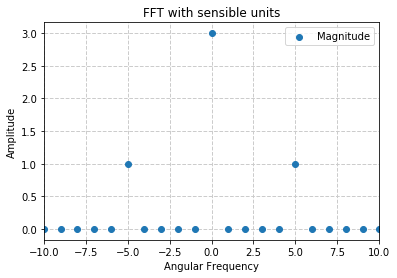

In [662]:
fig, ax = plt.subplots()
yfftr = np.real(res)
yr = res[0:int(len(res)/2)]
yi = res[int(len(res)/2):len(res)]
yfftr = np.concatenate([yi,yr]) #  Reflect negative signal portion 
x = np.arange(-int(len(res)/2),int(len(res)/2))/(max(theta)/(2*np.pi)) # x axis is fractions of 2pi period. E.g. 
res_scaled = (np.real(yfftr)**2 + np.imag(yfftr)**2)**(1/2)/len(res) # Norm of signal 
ax.scatter(x,res_scaled)
ax.set_xlim(-freq*2,freq*2)
ax.set_axisbelow(True)
ax.legend(['Magnitude'])
ax.set_xlabel('Angular Frequency')
ax.set_ylabel('Amplitude')
ax.set_title('FFT with sensible units')
ax.grid(color='0.8', linestyle='--', linewidth=1)

Right away we notice the offet at the 0 frequency. Also, **half** the amplitude is also represented at the +- frequency points. The FFT output is rather raw, below are the equations to abstract the key information from a FFT array:   

### Retreive Amplitude, Phase, and Frequency from FFT

Amplitude = $\frac{\sqrt{Re(FFT)^2 + Im(FFT)^2)}}{N} $ <br><br>
Phase = $ATAN2(\frac{Im(FFT)}{Re(FFT})$ <br><br>
Frequency Steps = $ [(0:N/2),(-N/2:0)] \cdot (\frac{T}{2\pi}) $ 

In [663]:
#res_angle = np.angle(res)
res_angle = np.arctan2(np.imag(res),np.real(res))
res_amp = (np.real(res)**2 + np.imag(res)**2)**(1/2)/len(res)
res_freq = np.concatenate([np.arange(0,int(len(res)/2)),np.arange(-int(len(res)/2),0)])*(2*np.pi/max(theta))
fft_res = np.array([res_amp,res_angle,res_freq]).T
fft_sort = fft_res[fft_res[:,0].argsort()]
fft_sort = np.flipud(fft_sort)

fft_n = 5 # Use this amount of samples to represent signal 

print('Top ' + str(fft_n) + ' FFT samples')
print(DataFrame(fft_sort[:fft_n], columns=['Amplitude',"Phase",'Frequency']))

Top 5 FFT samples
   Amplitude     Phase  Frequency
0   3.000693  0.000000   0.000000
1   1.000006 -2.347991  -5.010515
2   1.000006  2.347991   5.010515
3   0.002554 -2.263028  -6.012618
4   0.002554  2.263028   6.012618


### Reconstruct original signal from a part of the FFT

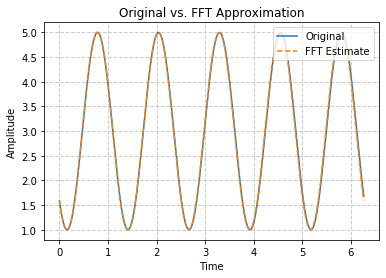

In [664]:
y_fft = np.ones([1,fft_n]) @ (np.array([fft_sort[0:fft_n,0]]).T * np.cos(np.array([fft_sort[0:fft_n,2]]).T * theta + np.array([fft_sort[0:fft_n,1]]).T  * (theta*0+1) )) 
y_fft = y_fft.flatten()
plt.plot(theta,y)
plt.plot(theta,y_fft,'--')
plt.legend(['Original','FFT Estimate'],loc='upper right')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('Original vs. FFT Approximation')
plt.grid(color='0.8', linestyle='--', linewidth=1)

### Conclusion

As observed, shockingly, we were able to model a cosine with the Fourier Transform(consine waves) 